# Trino Quickstart

Welcome to the Trino quick start. [Trino](https://trino.io)([formerly PrestoSQL](https://trino.io/blog/2020/12/27/announcing-trino.html)) is one of the fastest state-of-the-art distributed SQL query engine that can query data from data warehouses, data lakes, and a whole [array of other data sources](https://trino.io/docs/current/connector.html).

This binder serves as a quick way to get started with Trino by using the incredible [MyBinder Service](https://mybinder.readthedocs.io/en/latest/about/about.html) funded by companies in the [BinderHub Federation](https://mybinder.readthedocs.io/en/latest/about/federation.html). This binder uses [trino-notebook](https://github.com/bitsondatadev/trino-notebook), which extends the [Jupyter SciPy Notebook](https://github.com/jupyter/docker-stacks/tree/master/scipy-notebook). This enables us to not only showcase Trino's use cases, but also enables us to connect the foundational use cases of Trino to their upstream data science and upstream analytics use cases.


## Run Trino
The first step is to have a running instance of Trino. A simple script to launch Trino is provided. Give Trino about 20-30 seconds to start.

In [1]:
!~/run-trino

+ set +e
+ grep -s -q node.id /etc/trino/node.properties
+ NODE_ID_EXISTS=1
+ set -e
+ NODE_ID=
+ [[ 1 != 0 ]]
+ NODE_ID=-Dnode.id=f6a7bb669106
+ exec /usr/lib/trino/bin/launcher start --etc-dir /etc/trino -Dnode.id=f6a7bb669106
Started as 2192


## Trino CLI Client

Once Trino is running, we can first run queries via the Trino CLI.

In [3]:
!trino --execute 'SHOW CATALOGS'

"system"
"tpcds"
"tpch"


In [5]:
!trino --execute 'SHOW SCHEMAS IN tpch'

"information_schema"
"sf1"
"sf100"
"sf1000"
"sf10000"
"sf100000"
"sf300"
"sf3000"
"sf30000"
"tiny"


In [6]:
!trino --execute 'SHOW TABLES IN tpch.tiny'

"customer"
"lineitem"
"nation"
"orders"
"part"
"partsupp"
"region"
"supplier"


In [8]:
!trino --execute 'SELECT * FROM tpch.tiny.customer LIMIT 5'

"1126","Customer#000001126","8J bzLWboPqySAWPgHrl4IK4roBvb","8","18-898-994-6389","3905.97","AUTOMOBILE","se carefully asymptotes. unusual accounts use slyly deposits; slyly regular pi"
"1127","Customer#000001127","nq1w3VhKie4I3ZquEIZuz1 5CWn","10","20-830-875-6204","8631.35","AUTOMOBILE","endencies. express instructions wake about th"
"1128","Customer#000001128","72XUL0qb4,NLmfyrtzyJlR0eP","0","10-392-200-8982","8123.99","BUILDING","odolites according to the regular courts detect quickly furiously pending foxes? unusual theodolites use p"
"1129","Customer#000001129","OMEqYv,hhyBAObDjIkoPL03BvuSRw02AuDPVoe","8","18-313-585-9420","6020.02","HOUSEHOLD","pades affix realms. pending courts haggle slowly fluffily final requests. quickly silent deposits are. iro"
"1130","Customer#000001130","60zzrBpFXjvHzyv0WObH3h8LhYbOaRID58e","22","32-503-721-8203","9519.36","HOUSEHOLD","s requests nag silently carefully special warhorses. special accounts hinder slyly. fluffily enticing"


## Trino Python Library (SQLAlchemy)

Trino also supports [a Python library](https://github.com/trinodb/trino-python-client) that uses both the dbapi and SQLAlchemy. For this, we are using the SQLAlchemy flavor.

In [16]:
from sqlalchemy import create_engine
from sqlalchemy.sql.expression import text

engine = create_engine('trino://jovyan@localhost:8080/tpch')
connection = engine.connect()

rows = connection.execute(text("SELECT * FROM tiny.customer LIMIT 5"))
for r in rows:
    print(r)

(1, 'Customer#000000001', 'IVhzIApeRb ot,c,E', 15, '25-989-741-2988', 711.56, 'BUILDING', 'to the even, regular platelets. regular, ironic epitaphs nag e')
(2, 'Customer#000000002', 'XSTf4,NCwDVaWNe6tEgvwfmRchLXak', 13, '23-768-687-3665', 121.65, 'AUTOMOBILE', 'l accounts. blithely ironic theodolites integrate boldly: caref')
(3, 'Customer#000000003', 'MG9kdTD2WBHm', 1, '11-719-748-3364', 7498.12, 'AUTOMOBILE', ' deposits eat slyly ironic, even instructions. express foxes detect slyly. blithely even accounts abov')
(4, 'Customer#000000004', 'XxVSJsLAGtn', 4, '14-128-190-5944', 2866.83, 'MACHINERY', ' requests. final, regular ideas sleep final accou')
(5, 'Customer#000000005', 'KvpyuHCplrB84WgAiGV6sYpZq7Tj', 3, '13-750-942-6364', 794.47, 'HOUSEHOLD', 'n accounts will have to unwind. foxes cajole accor')


In [19]:
from sqlalchemy.schema import Table, MetaData
from sqlalchemy.sql.expression import select

engine = create_engine('trino://jovyan@localhost:8080/tpch')

# or using SQLAlchemy schema
nodes = Table(
    'customer',
    MetaData(schema='tiny'),
    autoload=True,
    autoload_with=engine
)
rows = connection.execute(select(nodes).limit(5)).fetchall()
for r in rows:
    print(r)

(1, 'Customer#000000001', 'IVhzIApeRb ot,c,E', 15, '25-989-741-2988', 711.56, 'BUILDING', 'to the even, regular platelets. regular, ironic epitaphs nag e')
(2, 'Customer#000000002', 'XSTf4,NCwDVaWNe6tEgvwfmRchLXak', 13, '23-768-687-3665', 121.65, 'AUTOMOBILE', 'l accounts. blithely ironic theodolites integrate boldly: caref')
(3, 'Customer#000000003', 'MG9kdTD2WBHm', 1, '11-719-748-3364', 7498.12, 'AUTOMOBILE', ' deposits eat slyly ironic, even instructions. express foxes detect slyly. blithely even accounts abov')
(4, 'Customer#000000004', 'XxVSJsLAGtn', 4, '14-128-190-5944', 2866.83, 'MACHINERY', ' requests. final, regular ideas sleep final accou')
(5, 'Customer#000000005', 'KvpyuHCplrB84WgAiGV6sYpZq7Tj', 3, '13-750-942-6364', 794.47, 'HOUSEHOLD', 'n accounts will have to unwind. foxes cajole accor')


/opt/conda/lib/python3.9/site-packages/trino/sqlalchemy/dialect.py:286: SAWarning: Dialect trino:rest will not make use of SQL compilation caching as it does not set the 'supports_statement_cache' attribute to ``True``.  This can have significant performance implications including some performance degradations in comparison to prior SQLAlchemy versions.  Dialect maintainers should seek to set this attribute to True after appropriate development and testing for SQLAlchemy 1.4 caching support.   Alternatively, this attribute may be set to False which will disable this warning. (Background on this error at: https://sqlalche.me/e/14/cprf)
  res = connection.execute(sql.text(query))


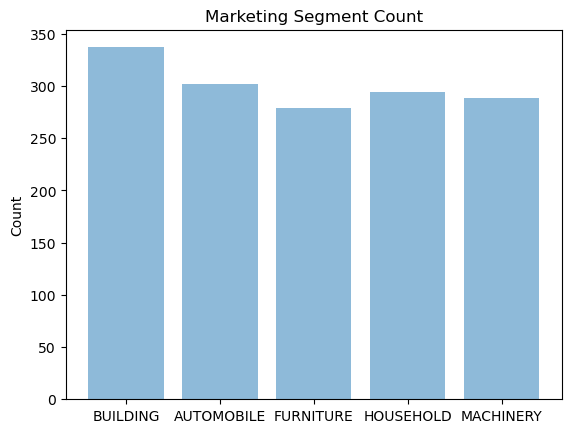

In [25]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

from sqlalchemy import create_engine
from sqlalchemy.sql.expression import text

engine = create_engine('trino://jovyan@localhost:8080/tpch')
connection = engine.connect()

rows = connection.execute(text("SELECT mktsegment, COUNT(*) FROM tiny.customer GROUP BY mktsegment"))
objects = []
performance = []
for r in rows:
    objects.append(r[0])
    performance.append(r[1])

y_pos = np.arange(len(objects))

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Count')
plt.title('Marketing Segment Count')

plt.show()